In [1063]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.ndimage as ndimage
from datetime import datetime, timedelta
from netCDF4 import num2date
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from __future__ import print_function
from metpy.units import units
from metpy.calc import get_wind_speed
import numpy.ma as ma
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [1064]:
dt = datetime(2011, 4, 22, 19) # Our specified time
dt1 = dt - timedelta(hours=12)
year = dt.year
month = dt.month
day = dt.day
UTC = dt.hour
UTC1 = dt1.hour
year1 = dt1.year
month1 = dt1.month
day1 = dt1.day
strm = str(month)
strd = str(day)
strh = str(UTC)
strm1 = str(month1)
strd1 = str(day1)
strh1 = str(UTC1)
if month < 10:
    strm = '0'+strm
if day < 10:
    strd = '0'+strd
if UTC < 10:
    strh = '0'+strh
if month1 < 10:
    strm1 = '0'+strm1
if day1 < 10:
    strd1 = '0'+strd1
if UTC1 < 10:
    strh1 = '0'+strh1

lat = 39.73
lon = -86.28

In [1065]:
#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/201504/20150422/catalog.xml')
cat = TDSCatalog('https://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/'+str(year)+str(strm)+'/'+str(year)+str(strm)+str(strd)+'/catalog.html?dataset=ruc130anl/'+str(year)+str(strm)+'/'+str(year)+str(strm)+str(strd)+'/ruc2anl_130_'+str(year)+str(strm)+str(strd)+'_'+str(strh)+'00_000.grb2')
#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/catalog.html?dataset=rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/rap_130_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'_000.grb2')
cat2 = TDSCatalog('https://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/'+str(year1)+str(strm1)+'/'+str(year1)+str(strm1)+str(strd1)+'/catalog.html?dataset=ruc130anl/'+str(year1)+str(strm1)+'/'+str(year1)+str(strm1)+str(strd1)+'/ruc2anl_130_'+str(year1)+str(strm1)+str(strd1)+'_'+str(strh1)+'00_000.grb2')

latest_ds = list(cat.datasets.values())[0]
latest_ds2 = list(cat2.datasets.values())[0]

print(latest_ds.access_urls)
ncss = NCSS(latest_ds.access_urls['NetcdfServer'])
ncss2 = NCSS(latest_ds2.access_urls['NetcdfServer'])


C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\siphon\catalog.py:71: UserWarning: URL https://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/201104/20110422/catalog.html?dataset=ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2 returned HTML. Changing to: https://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/201104/20110422/catalog.xml?dataset=ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2
  new_url))
C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\siphon\catalog.py:71: UserWarning: URL https://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/201104/20110422/catalog.html?dataset=ruc130anl/201104/20110422/ruc2anl_130_20110422_0700_000.grb2 returned HTML. Changing to: https://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/201104/20110422/catalog.xml?dataset=ruc130anl/201104/20110422/ruc2anl_130_20110422_0700_000.grb2
  new_url))


{'OPENDAP': 'https://nomads.ncdc.noaa.gov/thredds/dodsC/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'HTTPServer': 'https://nomads.ncdc.noaa.gov/thredds/fileServer/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'WCS': 'https://nomads.ncdc.noaa.gov/thredds/wcs/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'WMS': 'https://nomads.ncdc.noaa.gov/thredds/wms/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'NetcdfServer': 'https://nomads.ncdc.noaa.gov/thredds/ncss/grid/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'NCML': 'https://nomads.ncdc.noaa.gov/thredds/ncml/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'UDDC': 'https://nomads.ncdc.noaa.gov/thredds/uddc/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2', 'ISO': 'https://nomads.ncdc.noaa.gov/thredds/iso/ruc130anl/201104/20110422/ruc2anl_130_20110422_1900_000.grb2'}


In [1066]:

#ncss = NCSS(latest_ds.access_urls['NetcdfServer'])
#ncss = NCSS('http://nomads.ncdc.noaa.gov/thredds/ncss/grid/rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/rap_130_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'00_018.grb2/dataset.xml')

In [1067]:
cenlat = float(lat)
cenlon = float(lon)
query = ncss.query()
query.variables('Temperature_height_above_ground','MSLP_MAPS_System_Reduction','Convective_available_potential_energy_surface',
                'Convective_inhibition_surface','Dew_point_temperature','Storm_relative_helicity','Storm_relative_helicity_surface',
                'U-component_of_wind_height_above_ground','V-component_of_wind_height_above_ground', 'U-component_of_wind',
                'V-component_of_wind','Geopotential_height','Relative_humidity', 'Convective_available_potential_energy')
#query.add_lonlat().lonlat_box(cenlon-20, cenlon +20, cenlat-20, cenlat+20)
data = ncss.get_data(query)
T = (data.variables['Temperature_height_above_ground'][:] * units('kelvin')).to('degF')
MSL = (data.variables['MSLP_MAPS_System_Reduction'][:] * units('Pa')).to('hPa')
CAPE = data.variables['Convective_available_potential_energy_surface'][:] * units('J/kg')
MUCAPE = data.variables['Convective_available_potential_energy'][:] * units('J/kg')
CIN = data.variables['Convective_inhibition_surface'][:] * units('J/kg')
DWP = (data.variables['Dew_point_temperature'][:] * units('kelvin')).to('degF')
usfc = (data.variables['U-component_of_wind_height_above_ground'][:] * units('m/s')).to('knot')
vsfc = (data.variables['V-component_of_wind_height_above_ground'][:] * units('m/s')).to('knot')
SRH = data.variables['Storm_relative_helicity'][:]
SRH3 = data.variables['Storm_relative_helicity_surface'][:]
uwnd = (data.variables['U-component_of_wind'][:] * units('m/s')).to('knot')
vwnd = (data.variables['V-component_of_wind'][:] * units('m/s')).to('knot')
hgt = data.variables['Geopotential_height'][:]
rh = data.variables['Relative_humidity'][:]

print(T)
dtime = data.variables['U-component_of_wind'].dimensions[0]
dlev = data.variables['U-component_of_wind'].dimensions[1]
dlat = data.variables['U-component_of_wind'].dimensions[2]
dlon = data.variables['U-component_of_wind'].dimensions[3]

# Get the dimension data
lats = data.variables[dlat][:]
lons = data.variables[dlon][:]
lev = data.variables[dlev][:]
time = data.variables[dtime]
vtimes = num2date(time[:],time.units)

query1 = ncss2.query()
query1.variables('MSLP_MAPS_System_Reduction','Geopotential_height')
#query1.add_lonlat().lonlat_box(cenlon-20, cenlon+20, cenlat-20, cenlat+20)
data1 = ncss2.get_data(query1)
MSL1 = (data1.variables['MSLP_MAPS_System_Reduction'][:] * units('Pa')).to('hPa')
hgt1 = data1.variables['Geopotential_height'][:]

[[[[ 69.16997528  69.16997528  69.52999878 ...,  78.34998322  78.34998322     78.34998322]   [ 69.16997528  69.16997528  69.34998322 ...,  78.34998322  78.34998322     78.34998322]   [ 69.34998322  69.16997528  69.71000671 ...,  78.71000671  78.71000671     78.71000671]   ...,    [ 42.52999496  42.52999496  42.71000671 ...,  27.94998741  27.59001923     27.41000938]   [ 42.34998703  42.52999496  42.52999496 ...,  27.59001923  27.22999763     27.04998589]   [ 42.34998703  42.52999496  42.34998703 ...,  27.41000938  26.86997604     26.86997604]]]] degF


In [1068]:
print(np.mean(hgt))

5868.78


In [1069]:
#Get magnitudes for wind speeds
wind_mags = get_wind_speed(uwnd, vwnd)
print(wind_mags.shape)
print(wind_mags[0,6,:,:])

(1, 37, 337, 451)
[[  6.87252808   6.68015385   6.4878993  ...,  12.4223671   11.92576694   11.43403625] [  6.65465164   6.65465164   6.82840204 ...,  13.03390789  12.41932487   11.80475426] [  6.46163845   6.82840204   7.20272398 ...,  13.67339516  12.9232769   12.12217331] ...,  [ 38.01446152  37.66446304  37.55445099 ...,  21.31591797  21.33806419   21.55477142] [ 38.01446152  37.55243683  37.24529648 ...,  21.29552269  21.31591797   21.14506149] [ 38.01446152  37.40322113  36.79210281 ...,  21.29552269  21.10213089   20.90875626]] knot


In [1070]:
#Get height and pressure falls
hfalls = hgt[0,20,:,:]-hgt1[0,20,:,:]
pfalls = MSL[0,:,:]-MSL1[0,:,:]

In [1071]:
#Let's set up the map projection!
# Set up our projection
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Set up our array of latitude and longitude values and transform to 
# the desired projection.
clons, clats = np.meshgrid(lons[:]*1000, lats[:]*1000)
tlatlons = crs.transform_points(ccrs.LambertConformal(central_longitude=265, central_latitude=25, standard_parallels=(25.,25.)),clons,clats)
tlons = tlatlons[:,:,0]
tlats = tlatlons[:,:,1]

# Limit the extent of the map area, must convert to proper coords.
LL = crs.transform_point(cenlon-34,cenlat-16,ccrs.PlateCarree())
UR = crs.transform_point(cenlon+23,cenlat+8,ccrs.PlateCarree())

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='50m',
        facecolor='none')

In [1072]:
print(hfalls)

[[  5.29980469   5.           4.5        ...,  26.29980469  25.79980469
   25.39990234]
 [  5.39990234   3.90039062   2.60009766 ...,  26.5         26.29980469
   26.        ]
 [  5.60009766   3.10009766   1.10009766 ...,  27.          26.80029297
   26.70019531]
 ..., 
 [ -9.39990234  -7.29980469  -5.20019531 ...,  12.80029297  10.20019531
    6.89990234]
 [ -9.20019531  -7.29980469  -5.5        ...,   8.39990234   6.69970703
    4.79980469]
 [ -8.89990234  -7.39990234  -5.79980469 ...,   3.5          3.10009766
    2.60009766]]


In [1073]:
tors = np.genfromtxt('110421_rpts_torn.csv', skip_header = 1, usecols =(0,5,6), delimiter = ',')
time_tor = tors[0]
torlats = np.asarray(tors[1])
torlons = np.asarray(tors[2])
#time_tor = tors[:,0]
#torlats = tors[:,1]
#torlons = tors[:,2]
print(torlats)
print(torlons)

32.58
-99.91


In [1074]:
#dots = crs.transform_point(torlons,torlats,ccrs.PlateCarree())
#dots = crs.transform_points(ccrs.PlateCarree(),torlons,torlats)
inds = np.where((time_tor >= UTC * 100) & (time_tor < (UTC + 1) * 100))
print(inds[0])

[]


In [1075]:
#print(dots[inds,:].shape)
#print(dots[inds[0],2].shape)
#print(dots[0:3,2].shape)
#print(inds[0].shape[0])

[  997.84997559  1000.        ]


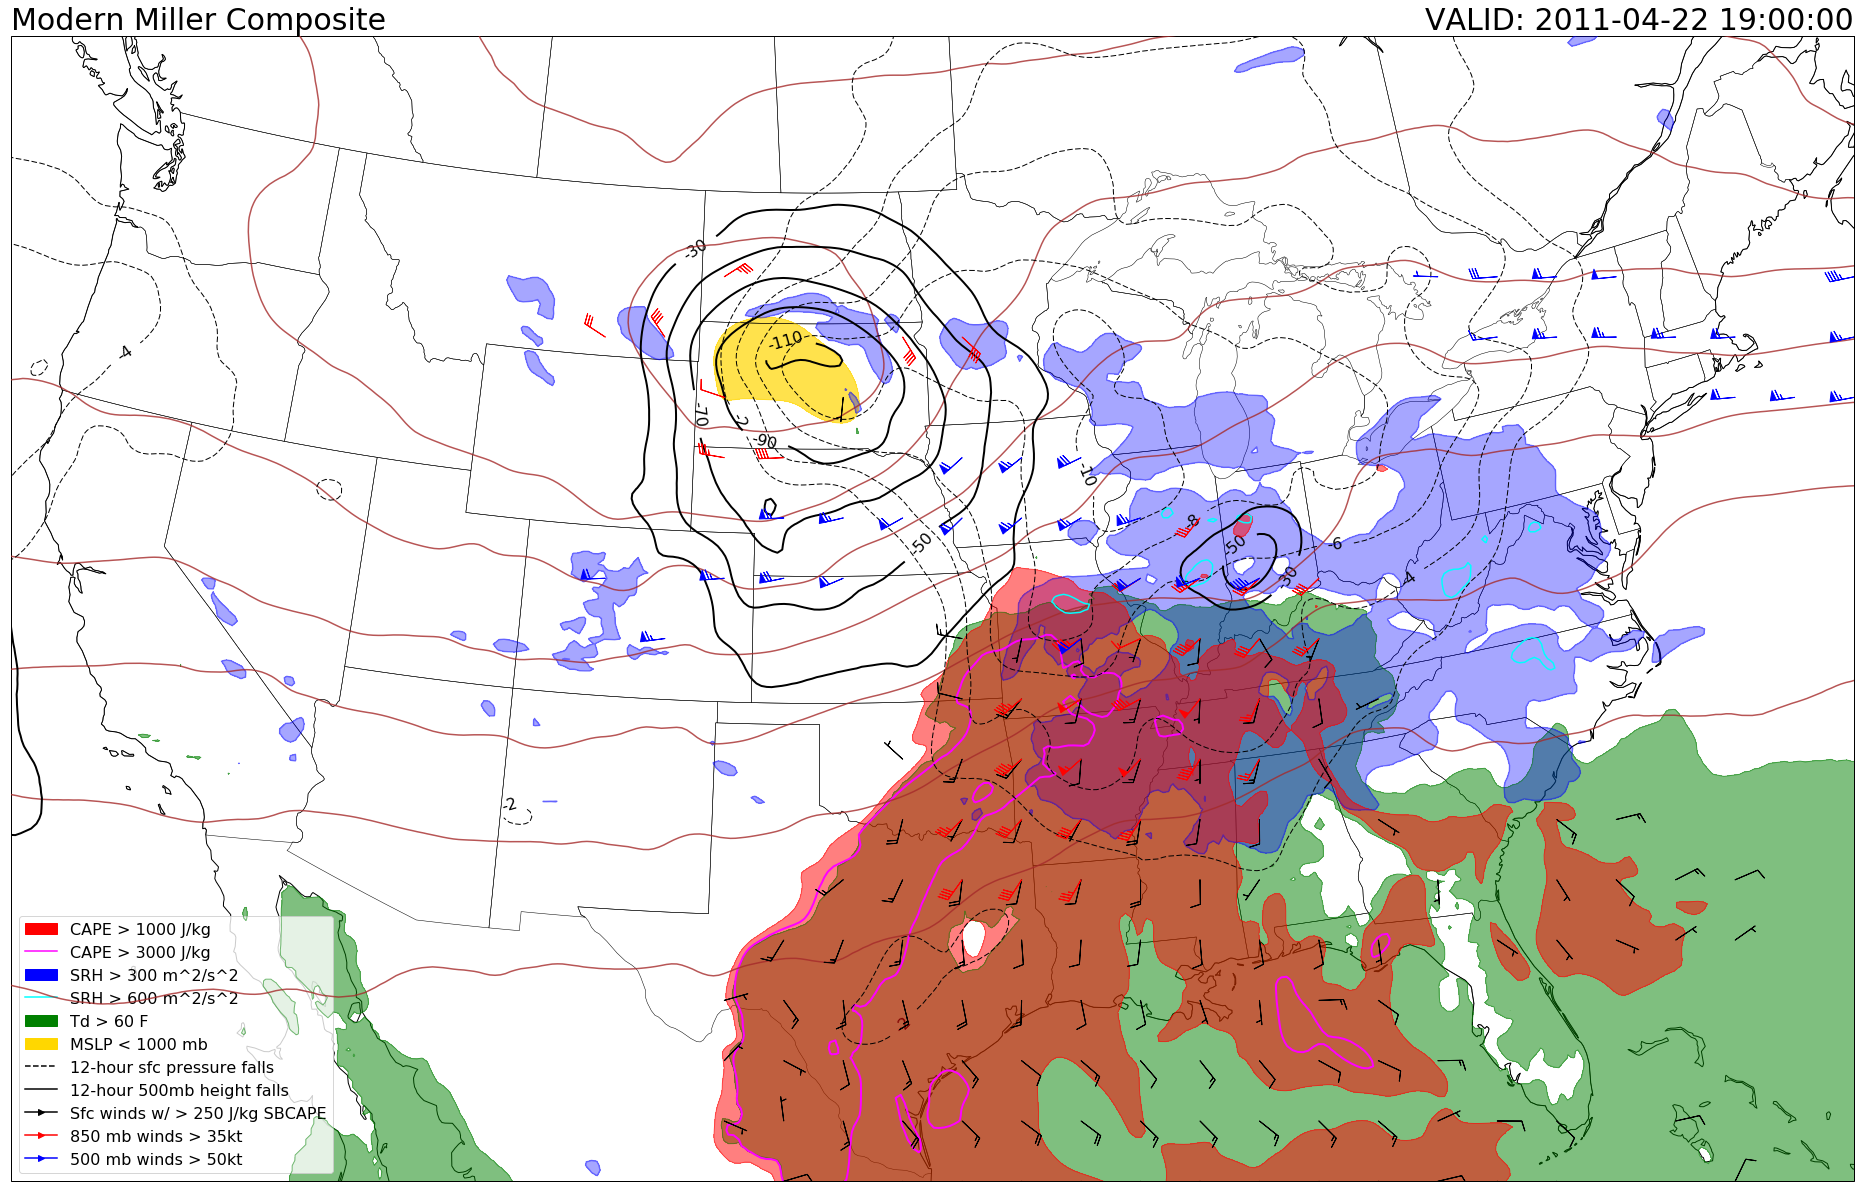

In [1076]:
%matplotlib inline
#plt.style.use('bmh')
# Choose Forecast Hour (FH), FH = 0 is the first hour of dataset
# You can change and rerun this cell to get the different forecast hour
FH = 0
fig=plt.figure(1,figsize=(26.,17.))
ax = plt.subplot(111,projection=crs)
#   ax.set_extent([west long, east long, south lat, north lat])
ax.set_extent([LL[0],UR[0],LL[1],UR[1]],crs)
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)
Tlev = np.arange(0, 105, 2)
Tdlev = np.arange(60, np.max(DWP).magnitude+((np.max(DWP).magnitude)-60)/2, (np.max(DWP).magnitude)-60)
Plev = np.arange(np.min(MSL).magnitude, 1000+(1000-np.min(MSL).magnitude)/2, (1000-np.min(MSL).magnitude))
print(Plev)
cplev = [3000]
cplev1 = [1000]
cslev = [600]
cslev1 = [300]
mslev = [1000]
dplev = [60]
h5lev = np.arange(5040, 5880, 60)
cpflev = np.arange(1000, np.max(MUCAPE).magnitude+((np.max(MUCAPE).magnitude)-1000)/2, (np.max(MUCAPE).magnitude)-1000)
srhflev = np.arange(300, np.max(SRH3)+((np.max(SRH3))-300)/2, (np.max(SRH3))-300)
hflevs = np.arange(-410,-10,20)
pflevs = np.arange(-20,0,2)
#Tds = ndimage.gaussian_filter(Tdf, sigma=1.1, order=0)
#plt.colorbar(cs,orientation='vertical', shrink =
if np.min(MSL).magnitude < 1000:
    cm = ax.contourf(tlons, tlats, MSL[FH,:,:],Plev,colors = 'gold', alpha = .7,zorder=1)
cpr = ax.contour(tlons, tlats, MSL[FH,:,:], mslev, colors = 'gold', linewidths = 1, alpha = .5,zorder=5)
cd1 = ax.contour(tlons, tlats, DWP[FH,0,:,:], dplev, colors = 'g', linewidths = 1, alpha = .5,zorder=6)
cp = ax.contour(tlons, tlats, MUCAPE[FH,0,:,:], cplev, colors = 'magenta', linewidths = 2,zorder=9)
cp1 = ax.contour(tlons, tlats, MUCAPE[FH,0,:,:], cplev1, colors = 'red', linewidths = 1, alpha = .5,zorder=7)
cb = ax.contour(tlons, tlats, SRH3[FH,:,:], cslev, colors = 'cyan', linwidths = 2,zorder=10)
cht = ax.contour(tlons, tlats, hgt[FH,20,:,:], h5lev, colors = 'brown', linwidths = 4, alpha=.8,zorder=9)
cb1 = ax.contour(tlons, tlats, SRH3[FH,:,:], cslev1, colors = 'blue', linwidths = 1, alpha = .4,zorder=8)
matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'
cfp = ax.contour(tlons, tlats, pfalls, pflevs, colors = 'k', linewidths =1,zorder=11)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
ch = ax.contour(tlons, tlats, hfalls, hflevs, colors = 'k', linewidths =2,zorder=12)
cd = ax.contourf(tlons, tlats, DWP[FH,0,:,:],Tdlev,colors = 'g', alpha = .5,zorder=2)
cs = ax.contourf(tlons, tlats, SRH3[FH,:,:],srhflev,colors = 'blue', alpha = .35, extend = 'max',zorder=3)
cf = ax.contourf(tlons, tlats, MUCAPE[FH,0,:,:],cpflev,colors = 'red', alpha = .5,zorder=4)
usmsk = ma.masked_where(CAPE[0,:,:].magnitude < 250, usfc[0,0,:,:])
vsmsk = ma.masked_where(CAPE[0,:,:].magnitude < 250, vsfc[0,0,:,:])
usmsk[usmsk.mask == True] = 0
vsmsk[vsmsk.mask == True] = 0
u850 = ma.masked_where(wind_mags[0,6,:,:].magnitude < 35, uwnd[0,6,:,:])
v850 = ma.masked_where(wind_mags[0,6,:,:].magnitude < 35, vwnd[0,6,:,:])
u850[u850.mask == True] = 0
v850[v850.mask == True] = 0
u500 = ma.masked_where(wind_mags[0,20,:,:].magnitude < 60, uwnd[0,20,:,:])
v500 = ma.masked_where(wind_mags[0,20,:,:].magnitude < 60, vwnd[0,20,:,:])
u500[u500.mask == True] = 0
v500[v500.mask == True] = 0

ut, vt = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, 
                                                     standard_parallels=(25.,25.)),clons,clats,usmsk,vsmsk)
ax.barbs(tlons,tlats,ut,vt,length=7,regrid_shape=20,sizes={'emptybarb':0},zorder=13)
ut850, vt850 = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, 
                                                     standard_parallels=(25.,25.)),clons,clats,u850,v850)
ax.barbs(tlons,tlats,ut850,vt850,length=7,regrid_shape=20,sizes={'emptybarb':0}, color = 'red',zorder=14)
ut500, vt500 = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, 
                                                     standard_parallels=(25.,25.)),clons,clats,u500,v500)
ax.barbs(tlons,tlats,ut500,vt500,length=7,regrid_shape=20,sizes={'emptybarb':0}, color = 'blue',zorder=15)
plt.clabel(ch, fontsize=16, inline=1, inline_spacing=5, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(cfp, fontsize=16, inline=1, inline_spacing=5, fmt='%i', rightside_up=True, use_clabeltext=True)

#plt.clabel(cm, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
#plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
#Create legend entries
cape_patch = mpatches.Patch(color='red', label='CAPE > 1000 J/kg')
cape_patch1 = mlines.Line2D([], [], color='magenta', label='CAPE > 3000 J/kg')
SRH_patch = mpatches.Patch(color='blue', label='SRH > 300 m^2/s^2')
SRH_patch1 = mlines.Line2D([], [], color='cyan', label='SRH > 600 m^2/s^2')
DWP_patch = mpatches.Patch(color='green', label='Td > 60 F')
MSL_patch = mpatches.Patch(color='gold', label='MSLP < 1000 mb')
pfall_line = mlines.Line2D([], [], color='black', linestyle = '--', label='12-hour sfc pressure falls')
hfall_line = mlines.Line2D([], [], color='black', linestyle = 'solid', label='12-hour 500mb height falls')
sfc_barb = mlines.Line2D([], [], color='black', linestyle = 'solid', marker = '>', label='Sfc winds w/ > 250 J/kg SBCAPE')
barb_850 = mlines.Line2D([], [], color='red', linestyle = 'solid', marker = '>', label='850 mb winds > 35kt')
barb_500 = mlines.Line2D([], [], color='blue', linestyle = 'solid', marker = '>', label='500 mb winds > 50kt')
inds = np.where((time_tor >= UTC * 100) & (time_tor < (UTC + 1) * 100))
#For 1 tornado
if inds[0].shape[0] > 0:
    ax.scatter(torlons, torlats, marker = 'v', s = 85, color = 'lime', zorder=16, transform=ccrs.PlateCarree())
#For multiple
#if inds[0].shape[0] > 0:
#    ax.scatter(dots[inds[0],0], dots[inds[0],1], marker = 'v', s = 85, color = 'lime', zorder=16)
plt.title('Modern Miller Composite',loc='left', size = '30')
plt.title('VALID: %s' %(vtimes[FH]),loc='right', size = '30')
plt.legend(handles=[cape_patch, cape_patch1, SRH_patch, SRH_patch1, DWP_patch, MSL_patch, pfall_line, hfall_line, sfc_barb, barb_850, barb_500], loc = 3, fontsize = 16)
plt.tight_layout()
plt.savefig('MilllerComposite'+str(year)+'-'+strm+'-'+strd+'_'+strh+'UTC.png')
plt.show()